In [174]:
import tensorflow as tf
import pandas as pd

In [175]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [223]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, input_shape = (784,), activation='softmax'))
model.add(tf.keras.layers.Dense(64, activation='softmax'))
model.add(tf.keras.layers.Dense(64, activation='softmax'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
          

optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model)

In [177]:
#Prepare training data and labels

x_train = train.iloc[:, 1:785].values.astype('float32')
y_train = train.iloc[:,0:1].values.astype('int32')

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_train = x_train/255.0

print(y_train)
print(x_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [182]:
#Prepare testing data

x_test = test.iloc[:, 0:785].values.astype('float32')
x_test = x_test/255.0

print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [198]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

In [224]:
print(len(x_train[0]),len(y_train[0]))
print(len(x_train),len(y_train))
print(x_train[0],y_train[0])


#print(x_train[0],y_train[0])
#print(model.evaluate(x_train[0],y_train[0]))
model.fit(x_train, y_train, epochs=10, batch_size=32)


(784, 10)
(37800, 37800)
(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.   

Epoch 1/10
37800/37800 [==============================] - 4s 97us/step - loss: 2.2154 - acc: 0.1843
Epoch 2/10
37800/37800 [==============================] - 2s 65us/step - loss: 1.5076 - acc: 0.4433
Epoch 3/10
37800/37800 [==============================] - 3s 69us/step - loss: 1.0521 - acc: 0.5600
Epoch 4/10
37800/37800 [==============================] - 2s 65us/step - loss: 0.8737 - acc: 0.6052
Epoch 5/10
37800/37800 [==============================] - 2s 64us/step - loss: 0.8148 - acc: 0.6334
Epoch 6/10
37800/37800 [==============================] - 2s 61us/step - loss: 0.7699 - acc: 0.6751
Epoch 7/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.7064 - acc: 0.7296: 0s - loss: 0.
Epoch 8/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.6084 - acc: 0.8297
Epoch 9/10
37800/37800 [==============================] - 2s 64us/step - loss: 0.4977 - acc: 0.8907: 2s - loss: 0.5079 - acc: 0.89 - ETA: 2s - loss: 0.5312 - ETA: 
Epoch 10/10
37800/378

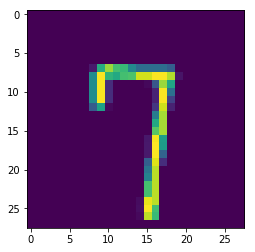

In [142]:
%matplotlib inline

plt.imshow(x_train[50].reshape(28,28))

In [226]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_103 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_104 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_105 (Dense)            (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [210]:
model.evaluate(x_val,y_val)

4200/4200 [==============================] - 0s 28us/step


[0.2728971719883737, 0.9338095238095238]

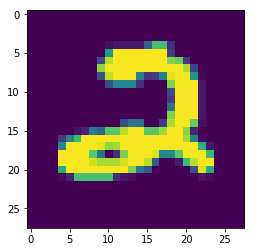

In [202]:
plt.imshow(x_test[0].reshape(28,28))

In [234]:
print(x_test[0].shape)
print(x_test[0])
result = model.predict(x_test)

(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [235]:
result[0]
# works

array([0.05805953, 0.05215624, 0.8005771 , 0.01973739, 0.00730792,
       0.0085723 , 0.0073555 , 0.01449497, 0.0202287 , 0.01151044],
      dtype=float32)

In [253]:
ImageId = []
Label = []

for i in range(1,len(result)+1):
    prediction = result[i-1].argmax()
    
    ImageId.append(i)
    Label.append(prediction)
    
d = {'ImageId': ImageId, 'Label': Label}
df = pd.DataFrame(data=d,index=None)

In [254]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [255]:
df.to_csv('output.csv',index=False)